In [11]:
import openeo

In [12]:
def make_connection():
    con = openeo.connect("openeo.dataspace.copernicus.eu")
    con.authenticate_oidc()
    return con

In [13]:
def download_datacube( connection, output_file, date_start, date_end, west, south, east, north, chosen_bands = ["B02", "B03", "B04"]):
    datacube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent={"west": west, "south": south, "east": east, "north": north},
    temporal_extent = [date_start, date_end],
    bands= chosen_bands,
)
    datacube.download(output_file+".nc")
    datacube.download(output_file+".png")

In [14]:
# Set parameters
date_start = "2023-05-03"
date_end = "2023-05-07"
west, south, east, north = 73.85, 18.46, 73.86, 18.47
chosen_bands = ["B02", "B03", "B04"]
name = 'rgb_sample'

In [15]:
con = make_connection()

# Zapisuje pobrany datacube do plików name.nc i name.png
download_datacube(con, name, date_start, date_end, west, south, east, north)

Authenticated using refresh token.


<xarray.DataArray (bands: 3, y: 113, x: 107)> Size: 145kB
array([[[1796., 1468., 1716., ..., 1418., 1122.,  957.],
        [1120., 1024., 1130., ..., 1608., 1096.,  816.],
        [1152., 1174., 1132., ..., 1606.,  818., 1007.],
        ...,
        [2116., 1924., 1930., ..., 1192., 1438., 1362.],
        [1449., 1960., 1926., ..., 1116., 1366., 1236.],
        [1706., 1848., 1726., ..., 1030., 1002.,  928.]],

       [[1850., 1478., 1444., ..., 1296.,  982.,  952.],
        [1312., 1024., 1184., ..., 1456., 1078.,  880.],
        [1098., 1238., 1118., ..., 1410.,  806.,  947.],
        ...,
        [1918., 1886., 1732., ..., 1082., 1188., 1474.],
        [1206., 1876., 1714., ...,  998., 1282., 1184.],
        [1444., 1922., 1466., ...,  862.,  960.,  954.]],

       [[1480., 1058., 1324., ..., 1130.,  882.,  792.],
        [ 818.,  766.,  982., ..., 1240.,  918.,  702.],
        [ 828., 1050.,  660., ..., 1218.,  706.,  836.],
        ...,
        [1804., 1748., 1652., ...,  819.,  9

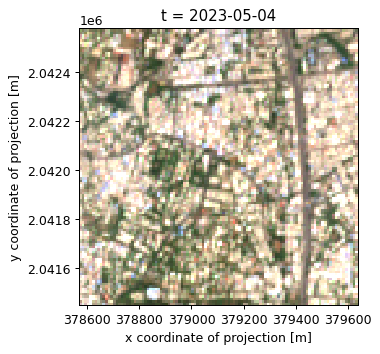

In [17]:
import xarray
import matplotlib.pyplot as plt
import numpy as np
ds = xarray.load_dataset(f"{name}.nc")
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")
data = np.squeeze(data)
print(data)
fig, ax = plt.subplots(ncols=1, figsize=(4, 4), dpi=90)
data.plot.imshow(vmin=0, vmax=2000, ax=ax)